In [3]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
location = gpd.read_file('../data/chipotle/us-states.json')

In [5]:
location.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


<Axes: >

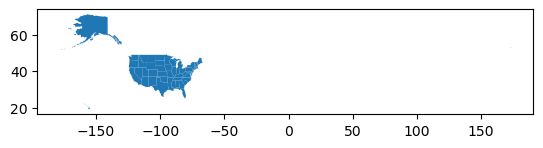

In [6]:
location.plot()

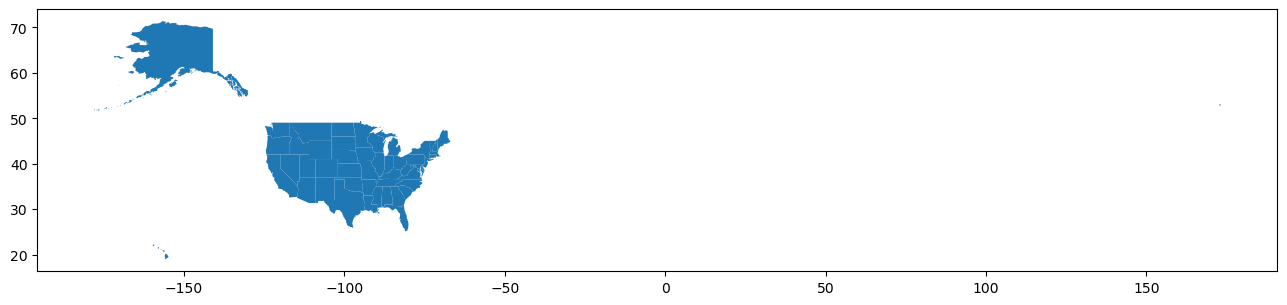

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
location.plot(ax = ax);

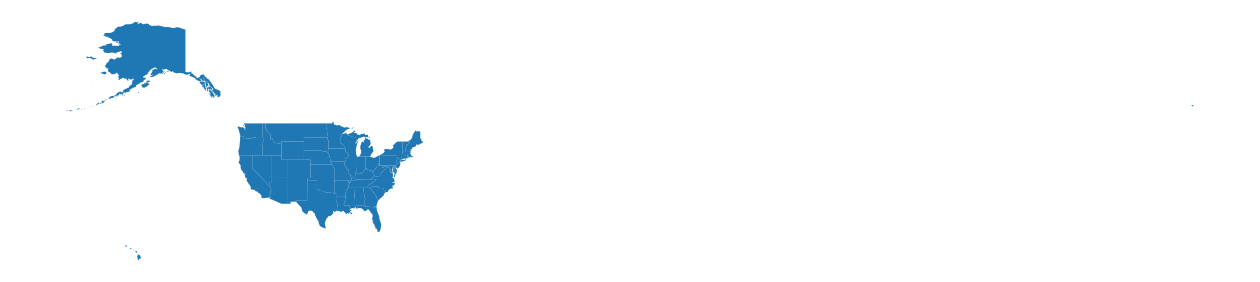

In [8]:
fig, ax = plt.subplots(figsize=(16,4))
location.plot(ax = ax)
ax.axis('off');

In [9]:
stores = pd.read_csv('../data/chipotle/chipotle_stores.csv')
stores.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [10]:
locations = pd.merge(left = location, right = stores, 
                    left_on = 'name', right_on = 'state')
locations.head()

,id,name,geometry,state,location,address,latitude,longitude
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


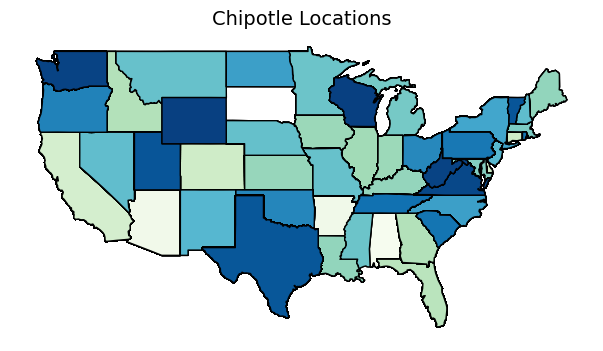

In [11]:
fig, ax = plt.subplots(figsize=(16,4))
locations.plot(
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Chipotle Locations', fontsize = 14)
ax.axis('off');

<Axes: >

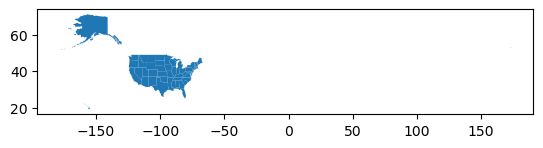

In [12]:
location.plot()

In [13]:
location.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
chip_geo = gpd.GeoDataFrame(stores, 
                           crs = location.crs, 
                           geometry = gpd.points_from_xy(stores.longitude, stores.latitude))

In [32]:
type(chip_geo)

geopandas.geodataframe.GeoDataFrame

In [28]:
locations.head()

,id,name,geometry,state,location,address,latitude,longitude
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


KeyError: 'route'

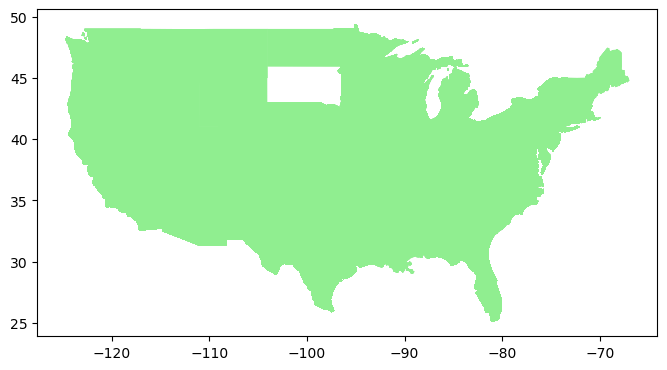

In [31]:
ax = locations.plot(figsize = (8, 10), color = 'lightgreen')
chip_geo.plot( ax = ax, column = 'route');
plt.show();

In [18]:
area_center = [center.y, center.x]

NameError: name 'center' is not defined

In [17]:
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

NameError: name 'area_center' is not defined